In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
data_model = pd.read_csv("data/model_dataset.csv")

print(data_model.shape)
print(data_model['presencia'].value_counts())

(887962, 24)
presencia
1    847962
0     40000
Name: count, dtype: int64


In [4]:
#data_model.isna().sum().sort_values(ascending=False)

In [5]:
#np.isinf(data_model[variables]).sum()

In [6]:
#mask_bad = (
#    data_model[variables].isna().any(axis=1) |
#    np.isinf(data_model[variables]).any(axis=1)
#)

#mask_bad.sum()

In [7]:
#data_model.loc[mask_bad, variables].head()

In [8]:
variables = [
'ph','clay','sand','bio1','bio2','bio3','bio8','bio9','bio10',
'bio11','bio12','bio14','bio15','bio18','bio20','bio23','bio24',
'bio27','bio30','bio31','bio34'
]

In [9]:
data_model = data_model.dropna(subset=variables).copy()

In [10]:

X = data_model[variables]
y = data_model['presencia']

X = sm.add_constant(X)

## Logistic GLM

In [11]:
log_model = sm.GLM(
    y,
    X,
    family=sm.families.Binomial()
).fit()

print(log_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              presencia   No. Observations:               887831
Model:                            GLM   Df Residuals:                   887809
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15757.
Date:                Wed, 11 Feb 2026   Deviance:                       31513.
Time:                        18:21:19   Pearson chi2:                 9.70e+07
No. Iterations:                    13   Pseudo R-squ. (CS):             0.2818
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1117      4.775      6.096      0.0

## Poisson GLM

In [12]:
pois_model = sm.GLM(
    y,
    X,
    family=sm.families.Poisson()
).fit()

print(pois_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              presencia   No. Observations:               887831
Model:                            GLM   Df Residuals:                   887809
Model Family:                 Poisson   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6406e+05
Date:                Wed, 11 Feb 2026   Deviance:                       32192.
Time:                        18:21:42   Pearson chi2:                 2.18e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05020
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5875      0.286     64.996      0.0

In [13]:
print("Logistic AIC:", log_model.aic)
print("Poisson AIC:", pois_model.aic)

print("Logistic BIC:", log_model.bic)
print("Poisson BIC:", pois_model.bic)

Logistic AIC: 31557.215027423215
Poisson AIC: 1728159.9356828134
Logistic BIC: -12128395.325894564
Poisson BIC: -12127716.605239175


G:\Thesis\.venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [14]:
coef_compare = pd.DataFrame({
    "logistic": log_model.params,
    "poisson": pois_model.params
})

coef_compare["difference"] = coef_compare["logistic"] - coef_compare["poisson"]
coef_compare

,logistic,poisson,difference
const,29.111676,18.587465,10.524212
ph,0.056213,-0.026035,0.082248
clay,-0.030947,0.000704,-0.031651
sand,0.008368,0.000022,0.008346
bio1,-0.476012,-0.480335,0.004323
bio2,1.513873,1.999426,-0.485553
bio3,0.370715,-0.896981,1.267696
bio8,0.062719,0.009988,0.052732
bio9,0.002875,-0.026511,0.029386
bio10,-0.820614,0.674325,-1.494938


In [15]:
pvals = pd.DataFrame({
    "logistic_p": log_model.pvalues,
    "poisson_p": pois_model.pvalues
})

pvals

,logistic_p,poisson_p
const,1.085870e-09,0.000000e+00
ph,1.563655e-01,3.143362e-46
clay,0.000000e+00,5.972339e-66
sand,1.026443e-19,7.202058e-01
bio1,1.414477e-01,4.250738e-94
bio2,3.009526e-05,0.000000e+00
bio3,5.144002e-02,0.000000e+00
bio8,3.522223e-03,4.465274e-17
bio9,8.760311e-01,1.405932e-127
bio10,5.963287e-04,0.000000e+00


In [16]:
log_pred = log_model.predict(X)
pois_pred = pois_model.predict(X)

pois_prob = pois_pred / pois_pred.max()

In [17]:
from sklearn.metrics import mean_squared_error

rmse_log = np.sqrt(mean_squared_error(y, log_pred))
rmse_pois = np.sqrt(mean_squared_error(y, pois_prob))

print("RMSE logistic:", rmse_log)
print("RMSE poisson:", rmse_pois)

RMSE logistic: 0.0593978897082091
RMSE poisson: 0.23517683206675344


In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
auc_log = roc_auc_score(y, log_pred)
auc_pois = roc_auc_score(y, pois_prob)

print("AUC logistic:", auc_log)
print("AUC poisson:", auc_pois)

AUC logistic: 0.9937355312466731
AUC poisson: 0.9815995638053764


In [20]:
coef_compare


,logistic,poisson,difference
const,29.111676,18.587465,10.524212
ph,0.056213,-0.026035,0.082248
clay,-0.030947,0.000704,-0.031651
sand,0.008368,0.000022,0.008346
bio1,-0.476012,-0.480335,0.004323
bio2,1.513873,1.999426,-0.485553
bio3,0.370715,-0.896981,1.267696
bio8,0.062719,0.009988,0.052732
bio9,0.002875,-0.026511,0.029386
bio10,-0.820614,0.674325,-1.494938


In [21]:
pvals

,logistic_p,poisson_p
const,1.085870e-09,0.000000e+00
ph,1.563655e-01,3.143362e-46
clay,0.000000e+00,5.972339e-66
sand,1.026443e-19,7.202058e-01
bio1,1.414477e-01,4.250738e-94
bio2,3.009526e-05,0.000000e+00
bio3,5.144002e-02,0.000000e+00
bio8,3.522223e-03,4.465274e-17
bio9,8.760311e-01,1.405932e-127
bio10,5.963287e-04,0.000000e+00


<Axes: xlabel='logistic', ylabel='poisson'>

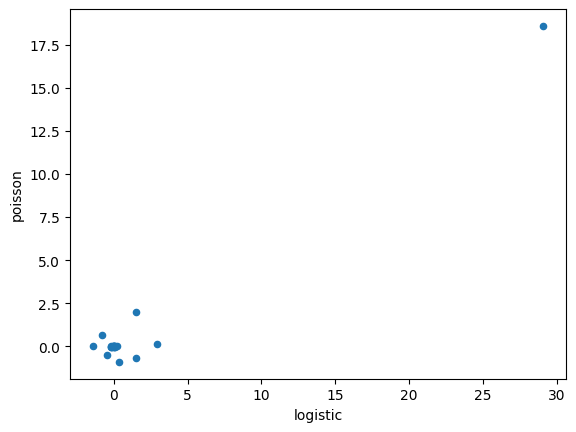

In [22]:
coef_compare.plot.scatter(x="logistic", y="poisson")

In [ ]:
sig_log = set(pvals[pvals["logistic_p"] < 0.05].index)
sig_pois = set(pvals[pvals["poisson_p"] < 0.05].index)

print("Common significant:", sig_log.intersection(sig_pois))

Common significant: {'bio2', 'bio18', 'bio10', 'bio20', 'bio34', 'bio23', 'bio27', 'clay', 'bio12', 'bio8', 'bio15', 'bio24', 'bio30', 'bio14', 'const', 'bio31', 'bio11'}


In [40]:
print("Logistic AIC:", log_model.aic)
print("Poisson AIC:", pois_model.aic)

Logistic AIC: 31557.215027423215
Poisson AIC: 1728159.9356828134
